# Supplementary Figures 9-12

Outlier removal metrics

In [1]:
library(ggpubr)

Loading required package: ggplot2



In [2]:
df <- read.csv(file = "../data/multi/combined_td_post_and_test.csv")

df$Out <- factor(df$Out, levels = c("ReBoost", "rPCA", "None")) # change order
df$Data <- factor(df$Data, levels = c("THCA","PRAD","LIHC","KIRC","BRCA","COAD","LUAD"))

head(df)

,X,Data,N,Out,DEA,FDR,logFC,median_deg,median_deg_adj,median_mcc,⋯,median_prec_adj,median_rec,median_rec_adj,median_rep,median_rep_adj,id,rnd_rep,rnd_mcc,rnd_prec,rnd_rec
,<int>,<fct>,<int>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,BRCA,3,ReBoost,DESeq2 Wald,0.001,0,718.5,876.0,0.1287263,⋯,0.9534446,0.05765143,0.07266206,0.1751701,0.1977240,0,0.02031707,-3.241152e-17,0.7149339,0.03982501
2,1,BRCA,3,ReBoost,DESeq2 Wald,0.001,1,718.5,876.0,0.3441934,⋯,0.9189796,0.17296307,0.21976318,0.1751701,0.1977240,0,0.02031707,2.794907e-17,0.1904347,0.03982501
3,2,BRCA,3,ReBoost,DESeq2 Wald,0.010,0,1249.0,1437.5,0.1415755,⋯,0.9605580,0.09385088,0.10723565,0.2155772,0.2371134,0,0.03585592,2.496810e-17,0.7149339,0.06922955
4,3,BRCA,3,ReBoost,DESeq2 Wald,0.010,1,1249.0,1437.5,0.4200659,⋯,0.8620301,0.28705257,0.32955817,0.2155772,0.2384403,0,0.03585592,1.435365e-16,0.1904347,0.06922955
5,4,BRCA,3,ReBoost,DESeq2 Wald,0.050,0,2084.5,2423.0,0.1503209,⋯,0.9587545,0.14502087,0.16167794,0.2458736,0.2667461,0,0.06131179,3.965317e-17,0.7149339,0.11553963
6,5,BRCA,3,ReBoost,DESeq2 Wald,0.050,1,2084.5,2423.0,0.4698055,⋯,0.7455956,0.41801676,0.46745810,0.2461140,0.2683662,0,0.06131179,2.279579e-17,0.1904347,0.11553963


In [3]:
met <- "prec0"
ylim <- c(0, 0.82)
labely <- c(0.75,0.75)

if (met=="rec") {
    ylab <- "Median Recall"
    ylim <- c(0,1)
    prefix <- "sfig12_"
} else if (met == "prec" || met == "prec0") {
    ylab <- "Median Precision"
    ylim <- c(0.55, 1)
    labely <- c(0.55,0.55)
    prefix <- "sfig11_"
} else if (met == "MCC" || met == "mcc0") {
    ylim <- c(0,1)
    ylab <- "Median MCC"
    prefix <- "sfig10_"
} else if (met == "rep") {
    ylim <- c(0,1)
    ylab <- "Median Replicability"
    prefix <- "sfig9_"
}

Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] |

[1] "../figures/sfig11_prec0_vs_outlier.pdf"


Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] |

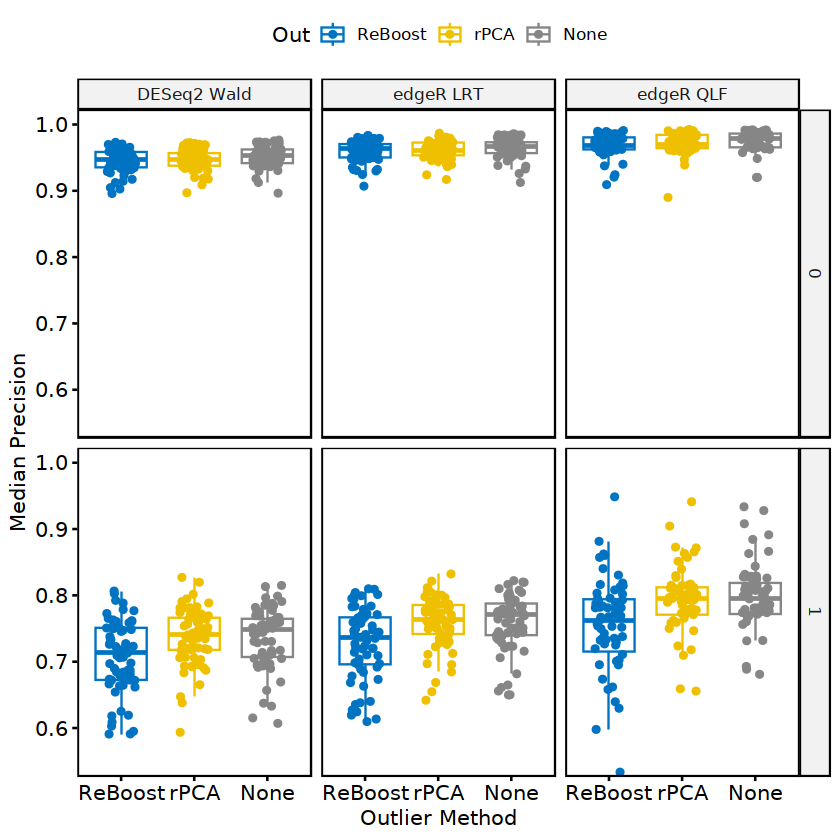

In [4]:
df_red <- df[which((df["FDR"] == 0.05) & (df["logFC"] != "test")),]
df_red <- df_red[which(df_red["N"] < 15),]
df_red$Out <- factor(df_red$Out, levels = c("ReBoost", "rPCA", "None"))

p <- ggboxplot(df_red, x = "Out", y = paste0("median_",met,"_adj"),
          color = "Out", palette = "jco", id="id",
          facet.by = c("logFC","DEA"), short.panel.labs = TRUE,
          add="jitter",scales="free",
          xlab="Outlier Method", ylab=ylab)


my_comparisons <- list(c("Jackknife","rPCA"), c("rPCA", "None"))
p <- p + stat_compare_means(label = "p.signif", comparisons = my_comparisons, paired = TRUE, method="wilcox.test")

ggpar(p, ylim = ylim)

figpath <- paste0("../figures/",prefix,met,"_vs_outlier.pdf")
print(figpath)
ggsave(figpath,height=8,width=9)

# Tests

In [5]:
N <- 3

patient <- factor(c(seq(N),seq(N)))
condition <- factor(c(rep("N",N),rep("T",N)))
design <- model.matrix(~patient+condition)

design

,(Intercept),patient2,patient3,conditionT
1,1,0,0,0
2,1,1,0,0
3,1,0,1,0
4,1,0,0,1
5,1,1,0,1
6,1,0,1,1


In [6]:
patient <- factor(rep(1:N, each=2))
condition <- factor(rep(c("N", "T"), times=N))
design <- model.matrix(~ patient + condition)
design

,(Intercept),patient2,patient3,conditionT
1,1,0,0,0
2,1,0,0,1
3,1,1,0,0
4,1,1,0,1
5,1,0,1,0
6,1,0,1,1


In [13]:
patients <- factor(c(seq(N),seq(N)))
condition <- factor(c(rep("N",N),rep("T",N))) # normal vs tumor (control vs treatment)
array = array(factor(c(patients,condition)),dim=c(length(patients),2))
coldata <- data.frame(array)#, row.names = colnames(x))
# colnames(coldata) <- c("patient","condition")

coldata

X1,X2
<chr>,<chr>
1,N
2,N
3,N
1,T
2,T
3,T


In [15]:
condition <- factor(c(rep("N",N),rep("T",N))) # normal vs tumor (control vs treatment)
array = array(factor(condition),dim=c(length(condition)))
coldata <- data.frame(array)#, row.names = colnames(x))
# coldata <- data.frame(array, row.names = colnames(x))
# colnames(coldata) <- c("patient","condition")

coldata

array
<chr>
N
N
N
T
T
T


# R tests

In [ ]:
library(edgeR)
library(dplyr)

In [2]:
outfile = "/storage/homefs/pd21v747/RNASeqReplicability/data/test/test.csv"
design_file <- "../data/GSEPN/GIPF/GIPF.meta.csv"
x = read.csv("../data/GSEPN/GIPF/GIPF.csv", row.names=1)
print(dim(x))
head(x)

[1] 18838   205


,control_1089,control_1092,control_1096,control_1097,control_1102,control_1109,control_1111,control_1112,control_1113,control_256,⋯,ipf_926,ipf_938,ipf_940,ipf_954,ipf_965,ipf_990,ipf_992,ipf_994,ipf_997,ipf_998
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,811,707,566,1338,577,655,1028,780,1092,767,⋯,1110,1197,910,516,2524,676,516,2240,2360,533
TNMD,0,0,0,0,0,0,5,0,6,0,⋯,8,2,0,0,0,0,3,0,0,6
DPM1,2241,2550,2115,2147,2045,2060,2841,2304,2084,1656,⋯,1831,1745,1381,1267,2376,1349,1259,1780,2324,2115
SCYL3,166,335,220,206,213,158,216,257,199,213,⋯,257,113,131,187,337,99,86,161,260,147
C1orf112,109,156,79,96,87,83,192,143,114,92,⋯,149,57,84,46,139,81,50,93,161,102
FGR,4156,7445,5172,5832,5423,1711,1891,1725,4236,3988,⋯,2391,720,1169,1301,5136,987,1849,1080,1732,3557


In [15]:
# Unpaired, controlled

run_edgeR(x, outfile, design_file, overwrite=TRUE, filter_expr=FALSE, top_tags = "Inf", 
                      lfc=0, cols_to_keep="all", test="qlf", meta_only=FALSE, check_gof=TRUE) 

[1] "Constructing design matrix from df"
[1] "Warning: hard-coded col names in design matrix"
[1] 205
[1] 205
[1] "Saved gof in /storage/homefs/pd21v747/RNASeqReplicability/data/test/gof.test.csv"


In [88]:
# Unpaired, uncontrolled

outfile2 = "/storage/homefs/pd21v747/RNASeqReplicability/data/test/test_unpaired.csv"
N_control <- sum(startsWith(colnames(x), "control"))
N_treat <- sum(startsWith(colnames(x), "ipf"))

run_edgeR(x, outfile2, design="unpaired", overwrite=TRUE, filter_expr=FALSE, top_tags = "Inf", 
                      lfc=0, cols_to_keep="all", test="qlf", meta_only=FALSE, check_gof=FALSE, N_control=N_control,N_treat=N_treat) 

[1] 205
[1] 205


In [90]:
outfile3 = "/storage/homefs/pd21v747/RNASeqReplicability/data/test/test_treat.csv"
run_edgeR(x, outfile3, design=design_file, overwrite=TRUE, filter_expr=FALSE, top_tags = "Inf",
                      lfc=1, cols_to_keep="all", test="qlf", meta_only=FALSE, check_gof=FALSE) 

[1] "Constructing design matrix from df"
[1] 205
[1] 205


In [5]:
save_table <- function(table, outfile) {
    suppressPackageStartupMessages(require("feather"))
    outfile_ext <- strsplit(basename(outfile), split="\\.")[[1]]
    outfile_ext <- outfile_ext[length(outfile_ext)]
    if (outfile_ext == "feather") {
        table = as.data.frame(table)
        table$Row = row.names(table)
        write_feather(table, outfile)  
    }
    else {
        write.csv(table, outfile, row.names = TRUE)
    }
}

In [14]:
run_edgeR <- function(x, outfile, design, overwrite=FALSE, filter_expr=FALSE, top_tags = "Inf", 
                      lfc=0, cols_to_keep="all", test="qlf", meta_only=FALSE, check_gof=FALSE, N_control=0, N_treat=0) {

    suppressPackageStartupMessages(require("edgeR"))
    suppressPackageStartupMessages(require("limma"))
    
    # Check if files already exist
    if (!overwrite && file.exists(outfile)) {
        print("Existing table not overwritten")
        return()
    }

    if (design == "paired") {
        if (ncol(x)%%2 != 0) {stop("Paired-design matrix must have even number of columns")}
        N <- ncol(x)/2
        patient <- factor(c(seq(N),seq(N)))
        condition <- factor(c(rep("N",N),rep("T",N))) # normal vs tumor (control vs treatment)
        design <- model.matrix(~patient+condition)
    } else if (design=="unpaired") {
        if (N_control == 0) {stop("Design matrix has no control columns")}
        if (N_treat == 0) {stop("Design matrix has no treatment/condition columns")}
        condition <- factor(c(rep("N",N_control),rep("T",N_treat)))
        design <- model.matrix(~condition)
    } else if (grepl("\\.csv$", design, ignore.case = TRUE)) {
        
        print("Constructing design matrix from df")
        covariate_df = read.csv(design)
        if (!("Condition" %in% colnames(covariate_df))) {stop("Error: 'Condition' column not found in dataframe")}
        
        covariate_df <- covariate_df %>%
          mutate_if(is.character, as.factor)
        
        other_vars <- setdiff(names(covariate_df), c("Condition", "X", "Sample"))
        print("Warning: hard-coded col names in design matrix")
        formula <- as.formula(paste("~", paste(c(other_vars, "Condition"), collapse = " + ")))
        design <- model.matrix(formula, data = covariate_df)
    }
    
    y <- DGEList(counts=x)

    print(length(rownames(design)))
    print(length(colnames(y)))
    rownames(design) <- colnames(y)

    if (filter_expr) {
        keep <- filterByExpr(y, design=design)
        y <- y[keep,,keep.lib.sizes=FALSE]
    }

    y <- calcNormFactors(y)
    y <- estimateDisp(y, design, robust=TRUE)
    
    if (meta_only)
        return(y)
    
    if (test=="lrt") fit <- glmFit(y,design)
    else fit <- glmQLFit(y,design)
    
    # Goodness-of-fit
    if (check_gof) {
        res.gof <- gof(fit, plot=FALSE)
        file_name <- basename(outfile)
        new_file_name <- paste0("gof.", file_name)
        new_file_path <- file.path(dirname(outfile), new_file_name)
        save_table(res.gof$gof.pvalues, new_file_path)
        print(paste("Saved gof in", new_file_path))
    }

    if (lfc>0) result <- glmTreat(fit, lfc=lfc)
    else if (test=="lrt") result <- glmLRT(fit)
    else result <- glmQLFTest(fit) # omit coef (edgeR user's guide p. 39)

    table = topTags(result, n = top_tags) #adjust.method="BH"
    
    if (any(cols_to_keep != "all")) {
        if (typeof(cols_to_keep)=="list") cols_to_keep = unlist(cols_to_keep)
        table <- table[ , cols_to_keep]
    }
    save_table(table, outfile)
}